# Tarea 5
---
Sofía García Salas

**ejercicio** : en data science y programación científica es común necesitar vectores con valores dentro de cierto intervalo, pero con sub-intervalos internos con diferente espaciamiento ,por ejemplo:

[0.  , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.7 , 0.8 , 0.9 , 1.  ]
       
El primer sub-intervalo incrementa de 0.1 en 0.1 , el segundo de 0.01 en 0.01 , y el tercero de 0.1 en 0.1 nuevamente.

Usando unicamente NumPy crea un vector de este tipo con el nombre xs .

**nota**: no es permitido usar ciclos, debe realizarse con operaciones "vectorizadas" de numpy

In [ ]:
# tu codigo aqui (~ 5 lineas de codigo):


**Ejercicio (parte de tarea)** En este caso usamos un ciclo  para ejemplificar pero ya hemos mencionado que debemos evitarlos siempre que sea posible y usar operaciones "vectorizadas" ya que es mucho mas rápido al utilizar  código pre-compilado de C, en este ejercicio debemos remplazar el calculo de ys para hacerlo de manera "vectorizada" y eliminar el ciclo for. 

**tip**: usar slicing

#### Ejemplos en DS:

**1)**
En machine learning se necesita una manera de "evaluar" nuestros modelos ,en ML del tipo "supervisado" para modelos de variables discretas categóricas  usamos  para esto  la "entropía cruzada" que mide la diferencia  entre 2 distribuciones de probabilidad,la que nuestro modelo predice vs la real obtenida de datos **ground truth** , una entropía cruzada alta es un modelo de ML malo y una entropía cruzada de 0 es un modelo de ML perfecto.

La entropía medida en bits(ojo,no cruzada, solo entropía) se define como "el promedio de información"(promedio ponderado) y la información se define se define como el negativo del logaritmo base 2 de la probabilidad . 

$$I(x) = -log_{2}P(x)$$

**Comentario**:La entropía es una medida de "incerteza", si un evento puede producir muchos resultados diferentes entonces tenemos una alta incerteza del evento lo cual se traduce a entropía alta.

La siguiente función calcula para cierta distribución de probabilidad dada por un vector px la información de cada elemento.

In [ ]:
def calcular_informacion(px):
    return np.log2(px)*-1 # teoría de la información

distribucion_prob1 = [1.0]
distribucion_prob2 = [0.5,0.5] # la entropia es maxima cuando todos tienen la misma prob
distribucion_prob3 = [1.0,0.0]
distribucion_prob4 = [0.9999]
distribucion_prob5 = [0.25,0.75]
distribucion_prob6 = [0.2]*5 # ojo estas son listas por lo tanto * la replica, no son arrays de numpy
distribucion_prob7 = [0.4,0.2,0.1,0.1,0.2]

print(calcular_informacion(distribucion_prob1))
print(calcular_informacion(distribucion_prob2))
print(calcular_informacion(distribucion_prob3))
print(calcular_informacion(distribucion_prob4))
print(calcular_informacion(distribucion_prob5))
print(calcular_informacion(distribucion_prob6))
print(calcular_informacion(distribucion_prob7))

[-0.]
[1. 1.]
[-0. inf]
[0.00014428]
[2.        0.4150375]
[2.32192809 2.32192809 2.32192809 2.32192809 2.32192809]
[1.32192809 2.32192809 3.32192809 3.32192809 2.32192809]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log2
  


**Ejercicio** Para calcular la información de una distribución de probabilidad necesitamos calcular el producto entre la información de cada posible x y su probabilidad , cada uno de estos elementos nos indica cuanta incerteza aporta cada x a la entropía de la distribución. Crea una función que calcule esto, debe recibir un vector representando a la dist. de probabilidad y devoler otro vector con el termino de entropía para cada x. Por ejemplo:

calcular_entropia([0.25,0.75])

Debe resultar en :

[0.5    ,    0.31127812]

**Nota**: la entropía es la suma sobre estos valores, en este caso no calculamos la entropía,unicamente los termimos de su sumatoria. La entropía es:

$$S = -\sum_i^nP(x_{i})log_{2}P(x_{i})$$

In [ ]:
# tu codigo aqui (~ 4 lineas de codigo)



**2)** 

A partir de la información en un data warehouse con un modelo de  datos el valor de clientes en el tiempo se ha determinado un modelo predictivo  no lineal que estima cuanta ganancia ha generado cierto cliente en 5 años en base a lo que ha gastado en su primer mes como cliente. 

El modelo tiene la forma:

$$g(x) = (x^{3} + 2x^{2} + e^{0.0001x} -\sqrt{2x})/50$$

Crear una función que calcule la ganancia para valores de gasto de nuevos clientes:

In [ ]:
def g(x): #<- vector
    
    ganancia = (np.power(x,3) + 2.0*(np.power(x,2.0))+np.exp(0.0001*x) - np.sqrt(2.0*x))/50
    
    return ganancia # <- vector del mismo tamaño que x
    
gastos = np.array([100,50,25,100]) #vector
ganancia = g(gastos)

print("Ganancias",ganancia)

Ganancias [20399.73735829  2599.82010025   337.37862871 20399.73735829]


**Ejercicio** : se ha determinado también que hay costos asociados a la comunicación y relación con los clientes(llamadas,mensajes electrónicos,etc) y que estos también tienen alta correlación con el monto que estos gastan en su primer més siguiendo el modelo:
$$c(x) = (x^{2} + x + log (0.0001x)-\sqrt{0.54x})/100$$

Cree una función para calcular este modelo sobre valores de de gasto de nuevos clientes , y luego cree una función  **ganancia_neta(x,g,c)** donde:
* x = vector conteniendo los valores de gasto del primer mes para nuevos clientes.
* g = función que estima la ganancia en función de x
* c = función que estima el costo en función de x

La función realiza el calculo simple **g(x) - c(x)** , ya que es posible que los modelos cambien en el tiempo es común recibir como parámetro el modelo o modelos hijos de un modelo mas grande , en este caso eso se logra recibiendo como parámetro las funciones de ganancia y costo.

In [ ]:
def ganancia2(x):
  return np.power(x,2)

def costos(x):
  return np.sqrt(x)

In [ ]:
def ganancia_neta(x,g,c):
  return g(x) - c(x)

ganancia_neta(x,ganancia2,costos)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


array([           nan,            nan, 0.00000000e+00, 1.02525513e+00,
       9.68377223e+01, 9.99000000e+03])

In [ ]:
x

array([ -5.3,  -1. ,   0. ,   1.5,  10. , 100. ])

**Ejercicio** Usando argmax crear una función mode(x) para calcular la moda de un vector x , esta función debe devolver una tupla de 2 elementos de la forma:

(valor,conteo)

**tip** investigar y auxiliarse de otras funciones de numpy y np.argmax, no olvidar trabajar todo vectorizado, sin ciclos.

In [ ]:
def mode(x):
    ## tu codigo aqui (~ 3 lineas de codigo):
    
print(mode(x))

IndentationError: ignored

In [ ]:
dist_a = np.array([0.3,0.5,0.2])

**Ejercicio** : crear una función para calcular la entropía  de una distribución de probabilidad representada como un vector.
$$S = -\sum_i^nP(x_{i})log_{2}P(x_{i})$$

**Nota**: a diferencia del ejercicio anterior donde solo calculamos los términos de la entropía, en este caso  si calculamos el valor completo de la entropía, que como mencionamos es una medida de incerteza en una distribución de probabilidad.

**recordatorio**: no usar ciclos solo operaciones vectorizadas.

In [ ]:
# tu codigo aqui (~ 3 lineas de codigo)



**Ejercicio**: En ML usamos la entropía cruzada como una forma de medir que tan bueno es un modelo de variables discretas a través de comparar la distribución de probabilidad que el modelo produce o predice, vs la distribución de probabilidad real dada por los datos de entrenamiento.

Podemos ver el siguiente ejemplo que define la forma en que se calcula la entropía cruzada y nos muestra un caso específico:

<img src="https://image.slidesharecdn.com/publishintroductiontodeeplearninginpythonandmatlab1-160502102437/95/introduction-to-deep-learning-in-python-and-matlab-54-638.jpg?cb=1462185644">

En este caso interpretamos así: El problema consiste en un modelo o algoritmo de ML que debe producir un vector de 3 elementos indicando la probabilidad de que ciertos datos X pertenezcan a una de 3 categorías.

* El modelo de ML produce un vector que indica que estima un 70% de probabilidad de que se trate de la categoría 0, 20% de probabilidad de que se trate de la categoría 1 y 10% de que se trate de la categoría 2.
* Los datos reales nos dicen que se trataba de un caso donde con total certeza se sabe que se trata de la categoría 0
* La entropía cruzada(a calcular en el ejercicio) nos indica que tan buena es la estimación del modelo, una EC de 0 es un modelo perfecto(en este caso un modelo que predice 100% de prob para la clase 0)

**Nota** 
* Aun que para calcular la entropía usamos logaritmos en base 2, en ML para calcular la entropía cruzada se usa logaritmo natural ya que con este se cumple el proposito **estimar que tanto se alejan las predicciones del modelo de ML de los datos reales** y es comunmente mas rápido de calcular en la computadora.
* Ya que estamos trabajando con vectores que representan distribuciones de probabilidad , podemos toparnos con lo que se conoce como : **sparse vectors**(vectores donde la mayoría de elementos son 0), esto puede producir problemas ya que le logaritmo de 0 no esta definido, tu solución debe tomar en cuenta esto y evitar que devuelva "nan"

In [ ]:
def cross_entropy(Y,Y_hat):
    ##tu codigo aqui (~ 1 lineas de codigo)
    
    

y  = np.array([1.0,0,0])
y_hat = np.array([0.7,0.2,0.1]) # <- resultado de algun modelo predictivo

cross_entropy(y,y_hat)


### Magnitud de un Vector(norma o módulo)
Ya hemos visto que en DS usamos vectores para representar información ,una propiedad importante de los vectores es la **magnitud** del vector. 

Matemáticamente la magnitud de un vector(también conocida como norma vectorial)  nos indica  el tamaño de este , y nos sirve para tener una noción de la distancia desde un punto de referencia(origen) hasta el punto representado por el vector.



<img src="http://mathonline.wdfiles.com/local--files/the-norm-of-a-vector/Screen%20Shot%202014-06-12%20at%205.37.19%20PM.png">

Se puede calcular con:

<img src="https://images.slideplayer.com/18/6074185/slides/slide_4.jpg">

En DS la interpretación de la magnitud depende del problema y significado del vector sobre el que se trabaje, ademas de ser también utilizada en calculos mas complejos,por ejemplo: **similitud por cosenos**.

<img src="https://machinelearningflashcards.com/images/L2_Norm_print.png">


Algunos ejemplos:
* En machine learning:
    * Si almacenamos en 2 vectores los errores producidos por 2 modelos de ML , podemos usar la magnitud de estos para determinar cual de los 2 modelos es mejor.
    * Cuando un modelo de ML "memoriza" en lugar de "aprender" decimos que sufre "overfitting" una forma de atacar este problema es usar "L2 regularization" que consiste en agregar a la "función de costo" un término de penalización que es calculado a partir de la magnitud de parámetros del modelo(cuadrado de la magnitud)
    
    <img src="https://cdn-images-1.medium.com/max/1600/1*JP9VzwxsRXjocb3WgVOTxA.png">
    * Un paso de pre-procesamiento común en ML es aplicar "normalización" a los datos, esto se logra(entre otras formas) dividiendo el vector de datos dentro de su magnitud de manera que tenga magnitud 1.
    
* En NLP(natural language processing): es común representar documentos como vectores n dimensionales, donde n es el número de palabras en cierto vocabulario, cada elemento "i" del vector indica cuantas veces aparece en el documento la palabra denotada por la posición "i" , podemos  usar la magnitud vectorial  para calcular la **similitud cosenoidal** y así estimar que tanto se  parece en contenido un documento a otro.
<img src="https://www.machinelearningplus.com/wp-content/uploads/2018/10/Cosine-Similarity-Formula-1.png">

**ejercicio** : crear una función que reciba como parámetro un vector x y calcule su magnitud o norma(euclidiana o L2) ,luego usarla para evaluar 2 vectores que representan los errores generados por 2 modelos de machine learning y concluir cual de los 2 modelos es mejor.

In [ ]:
def magnitud(x):
    ## tu codigo aqui (~ 1 linea de codigo)
    return np.sum(np.power(x,2)) # raiz cuadrada

errores_modelo1 = np.array([1,2,1,2]) #
errores_modelo2 = np.array([0,1,1,2]) #

print(magnitud(errores_modelo1))
print(magnitud(errores_modelo2))

# elegir el mejor modelo con una condicional(if)

**ejercicio** Usando la función del ejercicio anterior, crea otra función normalizar(x) que reciba de parámetro un vector x aplique normalización sobre este, el resultado debe ser un nuevo vector del tamaño de x cuya magnitud es igual a 1.0

In [ ]:
def normalizar(x):
    ## tu codigo aqui (~ 3 linea de codigo)
    
    

print(magnitud(normalizar(errores_modelo1)))
print(normalizar(errores_modelo2))

### Producto Punto(escalar,interno,interior) y Ortogonalidad

El producto punto(también conocido como producto escalar,producto interno o producto interior es una operación entre 2 vectores, cuyo resultado es un único número(escalar).

Existen basicamente 2 definiciones del producto punto siendo la más conocida la sumatoria de los productos entre elementos de los vectores.

Otra definición geométrica del producto punto puede ser obtenida basandonos en la magnitud de los vectores y el ángulo entre ellos.

<img src = "https://ocw.mit.edu/courses/mathematics/18-02sc-multivariable-calculus-fall-2010/1.-vectors-and-matrices/part-a-vectors-determinants-and-planes/session-2-dot-products/MIT18_02SC_L1Brds_5.png">

Por lo tanto podemos usar estas expresiones para encontrar el ángulo existente entre los 2 vectores.

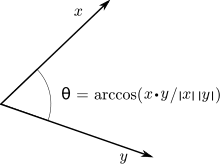

#### Interpretación 
Existen diversas interpretaciones de esta operación , algunas son :

* Que tan similares son 2 vectores: esto es útil en casos donde tengamos vectores de datos y necesitemos comparar su similitud.
* Proyectar un vector sobre otro: el producto punto es el tamaño de la proyección de un vector A sobre un vector B multiplicado por el tamaño del vector B
<img src="https://raw.githubusercontent.com/llealgt/Galileo_Python_DS/main/NumPy_algebra_lineal/dot_product.png">
* El producto punto es parte importante de la multiplicación de matrices(tema aún por desarrollar), una de las operaciones más importantes en AI a través de deep learning.


#### Usos y aplicaciones del producto punto

El producto punto tiene diversas aplicaciones en muchas ciencias, en ciencias de datos es muy utilizado y aplicado , por ejemplo:

* **En Machine Learning**:
    * En modelos lineales como regresión lineal o regresión lógistica es común guardar en un vector los parámetros de los modelos(aveces llamado W) y cuando queremos hacer inferencia sobre ciertos datos "x" almacenamos los datos "x" en un vector X y aplicamos la operación producto punto entre X y W.
    <img src="https://images.slideplayer.com/24/7356693/slides/slide_5.jpg">
    * Una interpretación geométrica del producto punto es que tan similares dos vectores son entre sí , las redes neuronales utilizan este principio  para definir multiples capas jerarquicas de "caraceterísticas"(representadas por neuronas) que buscar sobre ciertos datos de entrada X, estas  características  son definidas en vectores  por lo cual el producto punto es una medida de que tanto se parece cierto vector X a la característica que la neurona representa, un valor alto del producto punto indica alta similitud entre los datos X y la característica que la neurona "busca"
    <img src="https://miro.medium.com/max/816/1*BMSfafFNEpqGFCNU4smPkg.png">
    

#### Perpendicularidad 

Se dice que 2 vectores son perpendiculares si el producto punto entre ellos es igual a 0 ,geometricamente esto ocurre cuando los vectores se encuentran a 90 grados entre sí por lo cual en DS podemos interpretar que 2 vectores cuyo producto punto es 0, son vectores que difieren mucho por lo tanto son muy diferentes.


<img src="https://chortle.ccsu.edu/VectorLessons/vch07/acuteORobtuse.gif">
    
#### Producto punto en NumPy

En NumPy poseemos 2 maneras de calcular el producto punto sobre vectores de igual tamaño:

* np.dot:https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html#numpy.dot
* np.inner:https://docs.scipy.org/doc/numpy/reference/generated/numpy.inner.html

**¿Por que 2 operaciones?** Estas operaciones son diferentes cuando se trabaja con Tensores de rango mayor a 1 y pueden ser "configurables" , para Tensores de rango=1(vectores de igual tamaño,nuestro tema actual) son equivalentes.

In [ ]:
a = np.array([10,0]) #usuario1
b = np.array([0,10]) #usuario2

plt.arrow(0,0,a[0],a[1],head_width=0.1,head_length=0.1)
plt.arrow(0,0,b[0],b[1],head_width=0.1,head_length=0.1)
plt.xlim(-15,15)
plt.ylim(-20,20)
plt.show()

print(np.dot(a,b))

In [ ]:
f = np.array([0.1,0.2,0.3])
g = np.array([1,2,3])

print(f.dot(g))
print(np.dot(f,g))

#print(g.inner(f)) # operacion no existente en NumPy
print(np.inner(g,f))

**Ejercicio aplicado en DS**
Se tiene una red neuronal sencilla(y simplificada) como la de la siguiente imagen:
<img src="https://www.oreilly.com/library/view/practical-convolutional-neural/9781788392303/assets/246151fb-7893-448d-b9bb-7a87b387a24b.png">

Donde:
* INPUT LAYER: un vector X de tamaño = 2 que representa los datos de entrada
* HIDDEN_LAYER :capa oculta con 2 neuronas definidas por los vectores:
    * HL1 = [0.25,0.37]
    * HL2 = [-8,14]
* OUTPUT_LAYER = capa de salida definida por el vector [4,9]

Crear una funcion neural_network(X) para calcular:
* Calcule la salida de cada neurona en la capa intermedia aplicada a la capa de entrada.
* Use el resultado del paso anterior como entrada para la neurona en la capa de salida

Asumiendo que cada neurona identifica la similitud entre su entrada y la caracteística que representa concluir:
* Para cada vector de entrada Xi , cual neurona intermedia busca la característica que mas se parece a X.
* Cual vector de entrada Xi produce una activación alta(salida alta) en la capa de salida.

In [ ]:
# Aplicar la red neuronal sobre los siguientes datos X

X1 = np.array([0.50,0.72])
X2 = np.array([-4,7])
X3 = np.zeros_like(X2)
x4 = np.ones_like(X1)
X5 = np.random.randn(X1.shape[0])


**Ejercicio aplicado en DS**: la correlación cruzada es una medida de similitud entre 2 funciones como resultado de "desplazar" una sobre la otra, comunmente es usada para encontrar características relevantes en una función desconocida o no controlada.

En procesamiento de señales por ejemplo es usada para buscar y/o filtrar en una señal que varia en el tiempo cierta caracaterística de interés. Aveces es llamada también "sliding dot product" consiste en aplicar en cada punto de una función F el producto punto con cierta función G(comunmente mas corta) y luego "deslizar" G a un nuevo punto de la función, el resultado es una nueva función H que se interpreta como :**cuanto se parece** en cada punto la función F a la característica G. 

<img src="https://i.makeagif.com/media/11-25-2015/LZ9Ufj.gif">

En este ejercicio usamos correlación cruzada para calcular las medias moviles promediando 3 puntos que ya vimos en otro ejemplo:

El primer paso es definir la función G que define el "filtro" a aplicar, para este caso consiste simplemente en un vector con 3 elementos donde cada elemento corresponde a 1/3, luego debemos aplicar el producto punto sobre cada punto de la función o datos originales(en este ejemplo llamados x) a traves aplicar el producto punto en cada elemento "corriendolo" de uno en uno

In [ ]:
ruido = 0.1*np.random.randn(15) #el ruido comunmente se debe a aleatoriedad o captura no exacta de info.
x = np.linspace(0,2*np.pi,15) 
y = np.sin(x) + ruido

filtro = np.array([1/3,1/3,1/3]) #para lograr las medias moviles a traves de correlacion cruzada

## tu codigo aqui (~ 3 linea de codigo)

    



### Operadores lógicos en vectores

Que pasa si necesitamos aplicar condiciones y validaciones al trabajar con vectores?

Por ejemplo:
$$h(x) = \begin{cases}0 & x< 0\\1 & 0<=x <=1\\0 & x> 1\end{cases}$$

El siguiente código que refleja esta función da error.



In [ ]:
def h(x):
    if x < 0:
        return 0.0
    elif 0 <= x <= 1:
        return 1.0
    else:
        return 0.0
    
x = np.array([-1,0.1,10])

#h(x)

Para resolver el problema anterior(entre otras cosas) NumPy provee el uso de operadores lógicos sobre tensores , estos se aplican "elemento por elemento" gracias al broadcasting, el resultado de estos es valores booleanos True o False para cada valor.

Nuevamente **es importante hacer uso del broadcasting y no hacerlo con ciclos**

In [ ]:
x = np.linspace(-2,2,9)

y = x < 0

print(x,y)
print(len(x),len(y))

[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ] [ True  True  True  True False False False False False]
9 9


### Usando vectores booleanos para acceder elementos en otros vectores

NumPy nos permite acceder vectores con otros vectores de tipo booleano,el resultado de esto es obtener de cierto vector solo los elementos cuya posición corresponde a un valor True en el vector booleano,
con la sintáxis que usabamos para hacer indexing, pero usando un vector booleano como índice
por ejemplo para el caso anterior:

In [ ]:
print(x,y)

[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ] [ True  True  True  True False False False False False]


In [ ]:
x[y]

array([-2. , -1.5, -1. , -0.5])

In [ ]:
x[np.logical_not(y)]

array([0. , 0.5, 1. , 1.5, 2. ])

In [ ]:
x

array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ])

En este caso "y" es redundante y se pudo hacer:

In [ ]:
x[x<0]

array([-2. , -1.5, -1. , -0.5])

Explicación: el aplicar x < 0 generó un vector que tiene los primeros 4 elementos como True , si usamos este vector booleano como indice del vector original x entonces obtenemos solo los elementos de x que estan asociados a elementos True en el vector booleano de indice, en este caso solo los primeros 4.

**Ejercicio** dado el vector x, usar operadores lógicos sobre vectores y acceso a  elementos usando vectores booleanos , escribir un programa que calcule eun nuevo vector z conteniendo el valor absoluto de el vector x.

**nota** No se puede usar np.abs() ni ciclos

**tip** usar un vector booleano para saber que elementos son negativos y deben ser multiplicados por -1

In [ ]:
x = np.linspace(-2,2,9)


## tu codigo aqui (~ 4 linea de codigo)
### ver cuales elementos son negativos <- vector booleanos
### multiplicar esos elementos por -1
### usando el vector del rpimer paso remplazar los que eran negativos por su valor calculado en paso 2



**ejercicio** Implementar la función:
$$h(x) = \begin{cases}0 & x< 0\\1 & 0<=x <=1\\0 & x> 1\end{cases}$$

Esta debe funcionar para vectores de cualquier tamaño x:

def h(x):

    ...

**nota** debe ser implementada sin ciclos o ifs 

In [ ]:
def h(x):
    ## tu codigo aqui (~ 3 linea de codigo)
    

    ##
    return h

x = np.array([0.1,-2,0.5,5])
print(h(x))

Para casos donde se requiere comportamiento parecido a este pero con mas condiciones, NumPy provee la función **np.select** , la descripción de esta función casi siempre es mas complicada de lo que debería y dificulta entenderla, vamos a buscar entenderla bajo un ejemplo.

Básicamente select se basa en :
* una lista de condiciones A
* una lista de valores a tomar según estas condiciones B
* un valor de  resultado default cuando ninguna de las condiciones en la  lista se cumple.
Estas 2 listas deben ser del mismo tamañaño.

In [ ]:
x = np.arange(10)
condiciones = [x<3 , x>5] #lista A 
resultados =  [x,    x**2] #lista B

print(x)
#los valores de x que no satisfacen ningúna condicion obtendran 0 como resultado(este es el valor default)
np.select(condiciones,resultados) 

[0 1 2 3 4 5 6 7 8 9]


array([ 0,  1,  2,  0,  0,  0, 36, 49, 64, 81])

In [ ]:
np.select(condiciones,resultados,-1) #podemos agregar un tercer parámetro para el valor default 

array([ 0,  1,  2, -1, -1, -1, 36, 49, 64, 81])

In [ ]:
condiciones = [x<3]
resultados = [2]

np.select(condiciones,resultados)

array([2, 2, 2, 0, 0, 0, 0, 0, 0, 0])

Otro ejemplo

In [ ]:
x = np.linspace(1,10,10)
condiciones = [x<4,x>=7]
resultados =  [x ,  x**2]
k = np.select(condiciones,resultados,-1)

print(x)
print(k)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[  1.   2.   3.  -1.  -1.  -1.  49.  64.  81. 100.]


**Ejercicio**

Usando select implementar una función k(x) con la siguiente definición:
$$k(x) = \begin{cases}-x & x< 0\\x^{3}  &0<=x<1\\x^{2}  &1<=x<2\\4  &otherwise\end{cases}$$



##### Select y performance
Aun que select es muy conveniente y útil , no es la opción mas eficiente esto debido a que evalua todas las condiciones y todos los resultados, en programación en general buscamos escribir los programas de la manera mas eficiente posible y evitar calculos innecesarios, esto se vuelve vital en ciencia de datos cuando procesamos grandes volúmenes de información, por eso NumPy nos provee la alternativa a select llamada **piecewise** que funciona de manera similar .


Este funciona similar a select pero en vez de calcular todos los posibles resultados, calcula solo aquellos para los que la condición es True e ignora los False,sintácticamente piecewise requiere que los "resultados" sesan calcuados usando una lista de funciones por lo cual todos los resultados deben estar contenidos en una función  y el objeto función ser enviado a piecewise (si la función solo se utiliza una vez para este propósito, se puede usar funciones anónimas o lambda).

**Ejercicio** 
Investigar piecewise y:
*  Usarlo para implementar la función anterior de manera eficiente
*  Usar piscewise para implementar la función:

$$m(x) = \begin{cases}e^{2x} & x< 0\\1  &0<=x<1\\e^{1-x}  &x>=1\\\end{cases}$$

Nuevamente, sin utilizar ciclos ni ifs

#### Investigar

* Proyección vectorial
    * Definir una función para calculo en numpy
    * interpretación
    * aplicación o caso de uso en DS u otras ciencias de tu interés: solo se necesita nombrar el caso de uso, no desarrollarlo o programarlo, tip: Hay un algoritmo de ML cuyo nombre puede ser  útil.
* Producto cruz
    * calculo en numpy
    * interpretación
    * aplicación o caso de uso en DS u otras ciencias de tu interés: solo se necesita nombrar el caso de uso, no desarrollarlo o programarlo
    
#### Referencias

* https://www.oreilly.com/library/view/data-science-from/9781491901410/ch04.html
* https://towardsdatascience.com/linear-algebra-cheat-sheet-for-deep-learning-cd67aba4526c
* https://www.analyticsvidhya.com/blog/2017/05/comprehensive-guide-to-linear-algebra/
* https://towardsdatascience.com/boost-your-data-sciences-skills-learn-linear-algebra-2c30fdd008cf
* https://machinelearningmastery.com/examples-of-linear-algebra-in-machine-learning/
* https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab